# **1. Perkenalan Dataset**


Pada tahap ini, dataset diperoleh dari **public repository** yaitu **[GitHub](https://github.com/Salmanab16/kredit-macet)**, sesuai dengan ketentuan yang memperbolehkan penggunaan data dari sumber terbuka seperti *Kaggle*, *UCI ML Repository*, *Open Data*, maupun data primer.

Dataset ini berisi data nasabah bank yang mencakup informasi seperti status pembayaran kredit, umur, penghasilan, jumlah pinjaman, dan fitur relevan lainnya yang dapat digunakan untuk menganalisis kemungkinan terjadinya kredit macet.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
!pip install scikit-optimize
from skopt import BayesSearchCV

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 6.9 MB/s eta 0:00:00


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
# Baca file CSV dari URL
df = pd.read_csv('/content/drive/MyDrive/Data Science/Data/creditapproval-data_kotor.csv')

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
df.head()

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,x1,P,40.0,345000.0,1.0,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0,MACET
1,x2,L,31.0,350000.0,7.0,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0,MACET
2,x3,L,NaN,649926.0,6.0,108321.00,100,301,6000.0,1,874,875,649926.0,216642.00,0.0,MACET
3,x4,P,2.0,459168.0,NaN,38264.00,100,301,6000.0,1,874,875,459168.0,382640.00,0.0,MACET
4,x5,WANITA,34.0,3055499.0,8.0,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0,MACET


**Pendefinisian Variabel**

<br>

`jenis_kelamin` = Jenis kelamin terdiri dari P dan L \
`umur`          = usia nasabah \
`jml_pinjaman`  = jumlah pinjaman nasabah \
`jkw`           = jangka waktu (bulan) \
`jml_angsuran_per_bulan` = jumlah angsuran yang harus dibayar tiap bulan \
`type_pinjaman`  = tipe pinjaman \
`jenis_pinjaman`  = jenis pinjaman \
`bi_sektor_ekonomi` = Sektor Ekonomi BI \
`col` \
`bi_golongan_debitur` = golongan debitur \
`bi_gol_penjamin` = golongan penjamin \
`saldo_nominatif` = saldo nominatif nasabah
<br>
`tunggakan_pokok` = tunggakan pokok yang harus dibayar nasabah
<br>
`tunggakan_bunga` = tunggakan bunga yang harus dibayar nasabah  <br>
`status kredit` = status kredit nasabah          

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.shape
#menghitung jumlah baris dan kolom

(766, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_nasabah            766 non-null    object 
 1   jenis_kelamin           766 non-null    object 
 2   umur                    757 non-null    float64
 3   jml_pinjaman            766 non-null    float64
 4   jkw                     758 non-null    float64
 5   jml_angsuran_per_bulan  766 non-null    float64
 6   type_pinjaman           766 non-null    int64  
 7   jenis_pinjaman          766 non-null    int64  
 8   bi_sektor_ekonomi       765 non-null    float64
 9   col                     766 non-null    int64  
 10  bi_golongan_debitur     766 non-null    int64  
 11  bi_gol_penjamin         766 non-null    int64  
 12  saldo_nominatif         766 non-null    float64
 13  tunggakan_pokok         766 non-null    float64
 14  tunggakan_bunga         766 non-null    fl

In [6]:
duplicate = df[df.duplicated()]
print("Jumlah Data yang Duplikat : ", duplicate.shape)

Jumlah Data yang Duplikat :  (0, 16)


In [7]:
#mengecek jumlah missing value
df.isnull().sum()

,0
nama_nasabah,0
jenis_kelamin,0
umur,9
jml_pinjaman,0
jkw,8
jml_angsuran_per_bulan,0
type_pinjaman,0
jenis_pinjaman,0
bi_sektor_ekonomi,1
col,0


- terdapat 9 row kolom `umur` memiliki missing value
- terdapat 8 row kolom `jkw` memiliki missing value
- terdapat 1 row kolom `bi_sektor_ekonomi` memiliki missing value

In [9]:
df.describe(include='all')

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
count,766,766,757.000000,7.660000e+02,758.000000,7.660000e+02,766.0,766.000000,765.000000,766.000000,766.000000,766.000000,7.660000e+02,7.660000e+02,7.660000e+02,766
unique,766,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,x766,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MACET
freq,1,454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,556
mean,NaN,NaN,29.073976,2.712483e+06,19.011873,2.333917e+05,100.0,301.197128,6013.045752,1.216710,873.968668,281.300261,2.007386e+06,7.900853e+05,8.771708e+04,NaN
std,NaN,NaN,264.552192,9.995602e+06,32.231431,5.489682e+05,0.0,0.822267,216.196305,0.412273,1.460257,408.099019,8.711282e+06,4.139217e+06,5.682318e+05,NaN
min,NaN,NaN,-7162.000000,8.333333e+04,1.000000,0.000000e+00,100.0,301.000000,6000.000000,1.000000,834.000000,0.000000,-4.000000e+06,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,32.000000,8.489286e+05,8.000000,6.750000e+04,100.0,301.000000,6000.000000,1.000000,874.000000,0.000000,5.337500e+05,9.885424e+04,0.000000e+00,NaN
50%,NaN,NaN,38.000000,1.500000e+06,12.000000,1.050000e+05,100.0,301.000000,6000.000000,1.000000,874.000000,0.000000,9.462828e+05,3.391669e+05,0.000000e+00,NaN
75%,NaN,NaN,43.000000,2.000000e+06,20.000000,2.333334e+05,100.0,301.000000,6000.000000,1.000000,874.000000,875.000000,1.639582e+06,7.500000e+05,5.814889e+04,NaN


In [11]:
df.nunique()

,0
nama_nasabah,766
jenis_kelamin,6
umur,58
jml_pinjaman,328
jkw,51
jml_angsuran_per_bulan,449
type_pinjaman,1
jenis_pinjaman,5
bi_sektor_ekonomi,3
col,2


In [17]:
df['jenis_kelamin'].unique()

['P', 'L', 'WANITA', 'LAKI-LAKI', 'PRIA', 'PEREMPUAN']
Categories (6, object): ['L', 'LAKI-LAKI', 'P', 'PEREMPUAN', 'PRIA', 'WANITA']

Pada kolom **`jenis_kelamin`** dan **`status kredit`**, tipe data saat ini adalah `object`. Mengingat jumlah nilai unik pada kedua kolom tersebut tergolong sedikit, sebaiknya tipe data diubah menjadi `category`. Hal ini dapat meningkatkan efisiensi penggunaan memori serta mempercepat proses analisis data.

Selain itu, pada kolom **`jenis_kelamin`** ditemukan sebanyak **6 nilai unik**, padahal secara umum hanya terdapat dua kategori (Pria/Wanita). Hal ini menunjukkan adanya kemungkinan **kesalahan input** atau **variasi penulisan** (misalnya perbedaan huruf kapital, spasi, atau ejaan). Oleh karena itu, perlu dilakukan proses **pembersihan data (data cleaning)** agar hasil analisis menjadi lebih akurat dan konsisten.


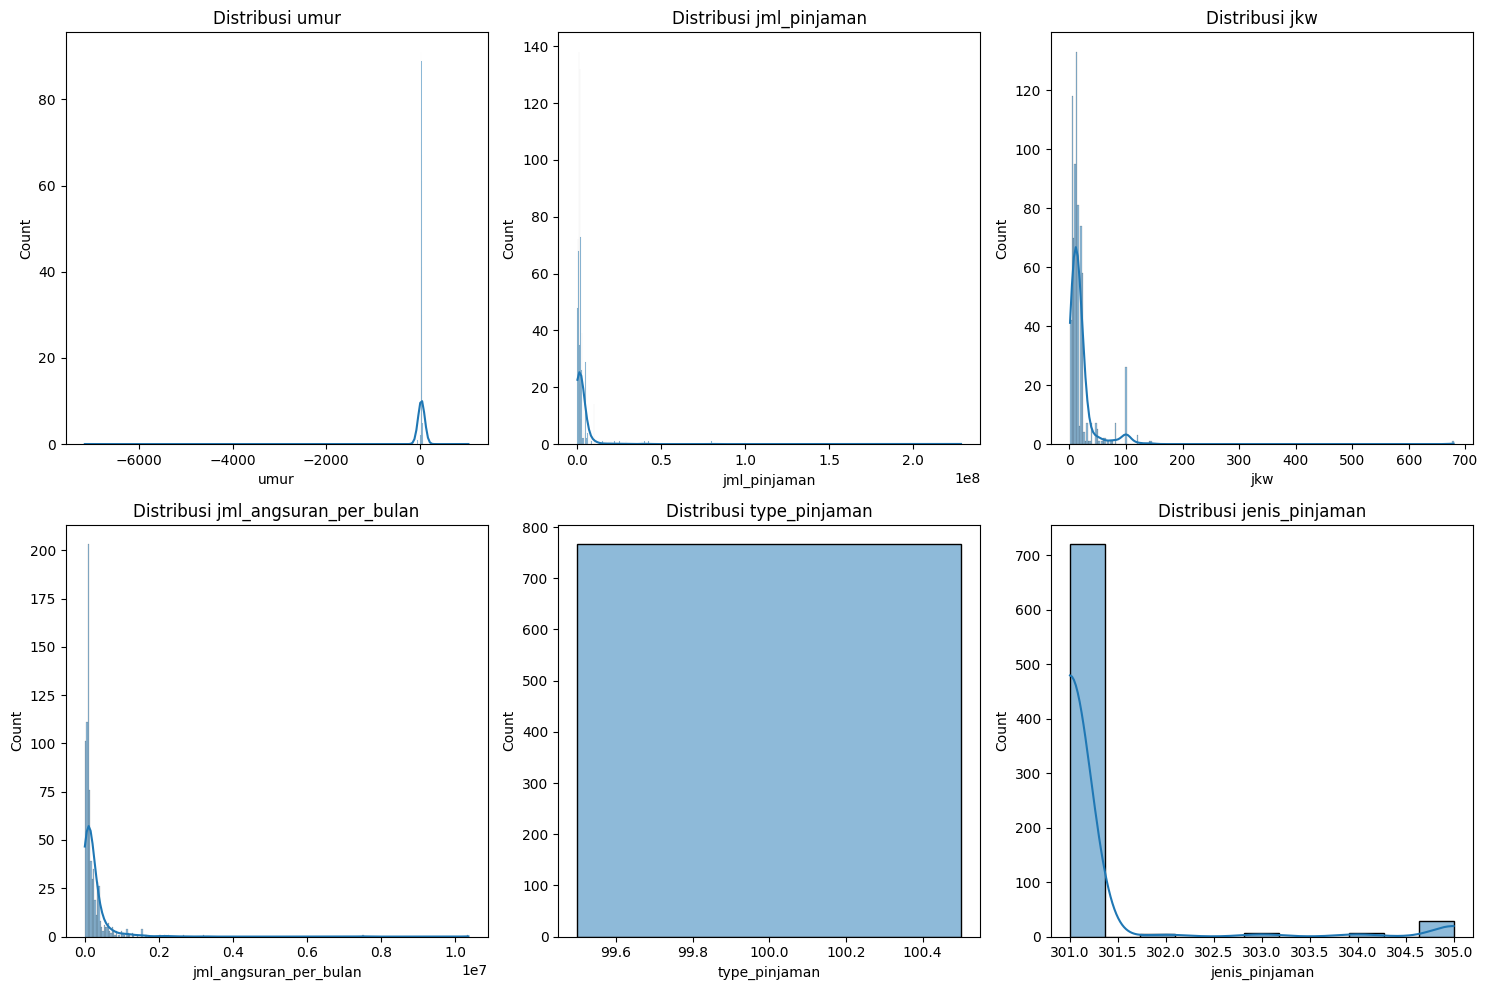

In [12]:
# Kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot distribusi
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:6]):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()


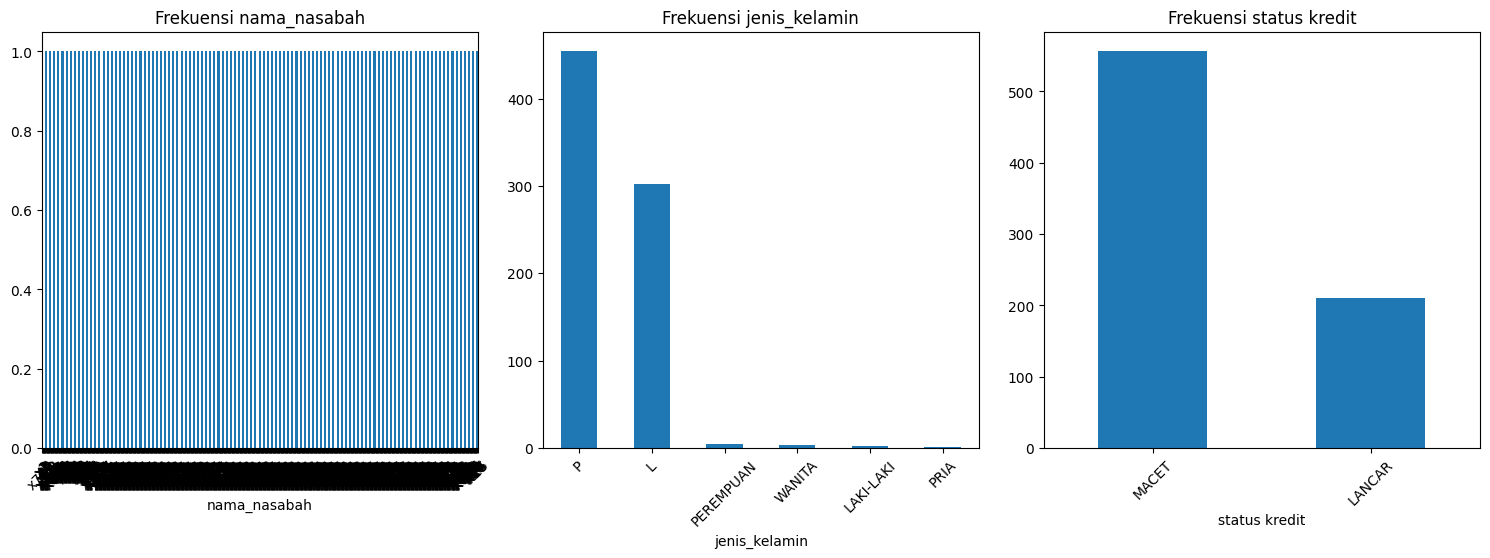

In [13]:
# Kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns

# Plot frekuensi
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols[:6]):
    plt.subplot(2, 3, i+1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frekuensi {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


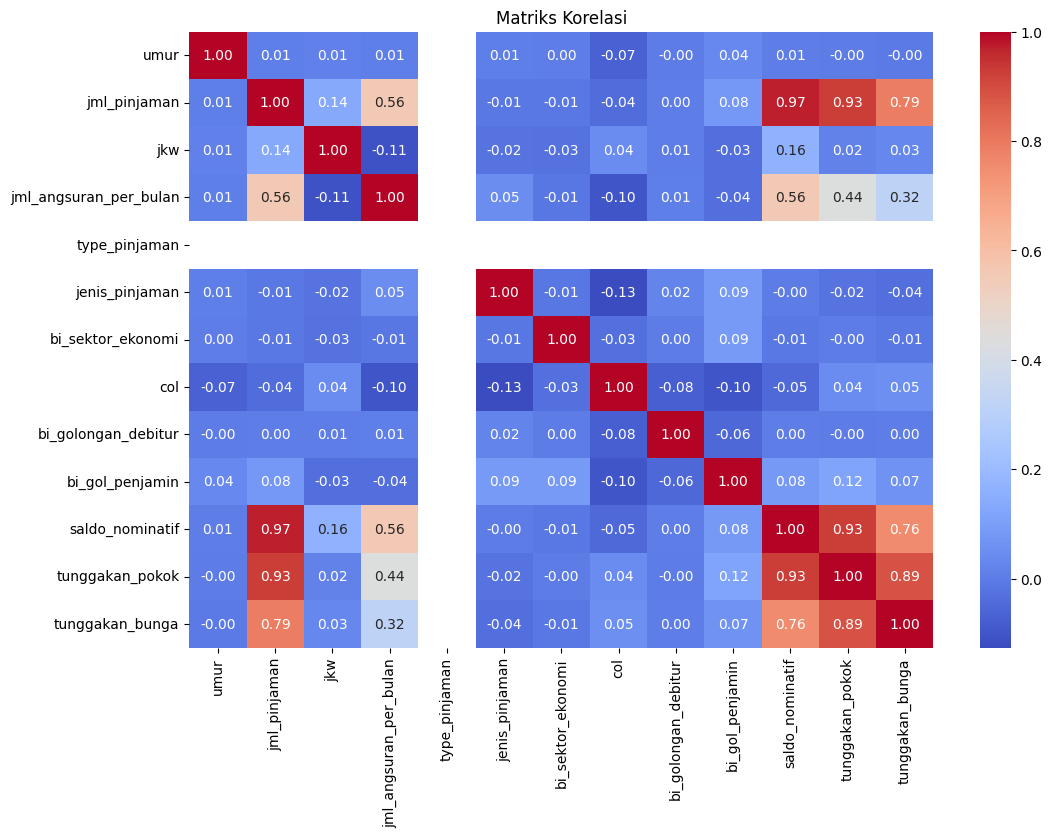

In [14]:
# Matriks korelasi
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [15]:
data = df.dropna() # data dihapus tapi file asli masih utuh
#df.dropna(inplace = True) akan menghapus juga di data aslinya
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 753 entries, 0 to 765
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_nasabah            753 non-null    object 
 1   jenis_kelamin           753 non-null    object 
 2   umur                    753 non-null    float64
 3   jml_pinjaman            753 non-null    float64
 4   jkw                     753 non-null    float64
 5   jml_angsuran_per_bulan  753 non-null    float64
 6   type_pinjaman           753 non-null    int64  
 7   jenis_pinjaman          753 non-null    int64  
 8   bi_sektor_ekonomi       753 non-null    float64
 9   col                     753 non-null    int64  
 10  bi_golongan_debitur     753 non-null    int64  
 11  bi_gol_penjamin         753 non-null    int64  
 12  saldo_nominatif         753 non-null    float64
 13  tunggakan_pokok         753 non-null    float64
 14  tunggakan_bunga         753 non-null    float64

In [16]:
# Mengumpulkan kolom-kolom yang dingin diubah pada 1 list
kolom_diubah = ['jenis_kelamin', 'status kredit']

data[kolom_diubah] = data[kolom_diubah].astype('category')
data.dtypes

<ipython-input-16-7121367eda75>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[kolom_diubah] = data[kolom_diubah].astype('category')


,0
nama_nasabah,object
jenis_kelamin,category
umur,float64
jml_pinjaman,float64
jkw,float64
jml_angsuran_per_bulan,float64
type_pinjaman,int64
jenis_pinjaman,int64
bi_sektor_ekonomi,float64
col,int64


In [18]:
data["jenis_kelamin"] = data["jenis_kelamin"].replace("WANITA", "P")
data["jenis_kelamin"] = data["jenis_kelamin"].replace("PEREMPUAN", "P")
data["jenis_kelamin"] = data["jenis_kelamin"].replace("LAKI-LAKI", "L")
data["jenis_kelamin"] = data["jenis_kelamin"].replace("PRIA", "L")


<ipython-input-18-929c7ae829df>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data["jenis_kelamin"] = data["jenis_kelamin"].replace("WANITA", "P")
<ipython-input-18-929c7ae829df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["jenis_kelamin"] = data["jenis_kelamin"].replace("WANITA", "P")
<ipython-input-18-929c7ae829df>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change th

In [19]:
data['jenis_kelamin'].unique()

['P', 'L']
Categories (2, object): ['L', 'P']

In [20]:
target = [ 'jenis_kelamin']
label_encoder = LabelEncoder()

# Apply Label Encoding to the target columns
for column in target:
    data[column] = label_encoder.fit_transform(data[column])

# Display the DataFrame 'data' after Label Encoding
data[target]

<ipython-input-20-dff01a82ec9c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoder.fit_transform(data[column])


,jenis_kelamin
0,1
1,0
4,1
7,0
9,0
...,...
761,0
762,1
763,0
764,1


In [21]:
data.drop('nama_nasabah', axis=1, inplace=True)
data.head()

<ipython-input-21-1c57ba7f76d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('nama_nasabah', axis=1, inplace=True)


,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,1,40.0,345000.0,1.0,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0,MACET
1,0,31.0,350000.0,7.0,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0,MACET
4,1,34.0,3055499.0,8.0,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0,MACET
7,0,27.0,4435001.0,8.0,671098.00,100,301,6000.0,1,874,875,4435001.0,0.00,0.0,LANCAR
9,0,49.0,1443750.0,15.0,107800.00,100,301,6000.0,1,874,875,1617000.0,1078000.00,0.0,MACET
